In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
df = pd.read_csv('train_csv.csv')

df

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70
...,...,...,...
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28


In [0]:
df.head
df.reset_index(drop=True, inplace=True)

In [4]:
df.shape

(80, 3)

In [5]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


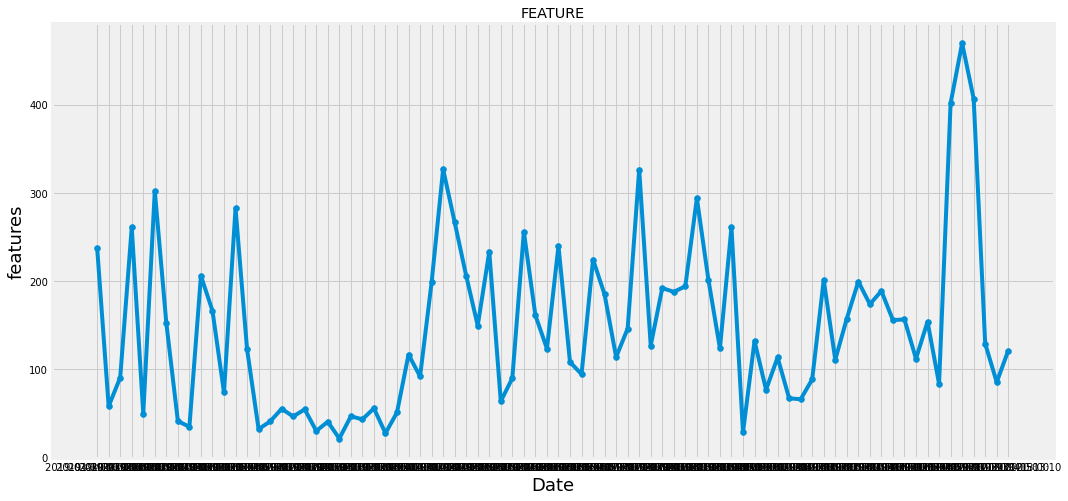

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('FEATURE')
plt.scatter(df['time'], df['feature'])
plt.plot(df['time'], df['feature'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('features',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['feature'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [9]:
training_data_len

64

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [11]:
len(scaled_data)

80

In [12]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

64

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
63/63 [==============================] - 2s 25ms/step - loss: 0.0436


In [21]:
#Test data set
test_data = scaled_data[training_data_len - 1: , : ]
len(test_data)

17

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(1,len(test_data)):
    x_test.append(test_data[i-1:i,0])

In [23]:
x_test

[array([0.40103934]),
 array([0.19946026]),
 array([0.30334999]),
 array([0.39702471]),
 array([0.33981622]),
 array([0.37320457]),
 array([0.29944687]),
 array([0.30132037]),
 array([0.20195825]),
 array([0.29545455]),
 array([0.13861629]),
 array([0.84768936]),
 array([1.]),
 array([0.85964404]),
 array([0.23987421]),
 array([0.14256401])]

In [24]:
y_test

array([[110.79],
       [157.37],
       [199.37],
       [173.72],
       [188.69],
       [155.62],
       [156.46],
       [111.91],
       [153.83],
       [ 83.51],
       [401.43],
       [469.72],
       [406.79],
       [128.91],
       [ 85.28],
       [121.12]])

In [25]:
len(x_test)

16

In [26]:
len(y_test)

16

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [30]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

118.6191679527598

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


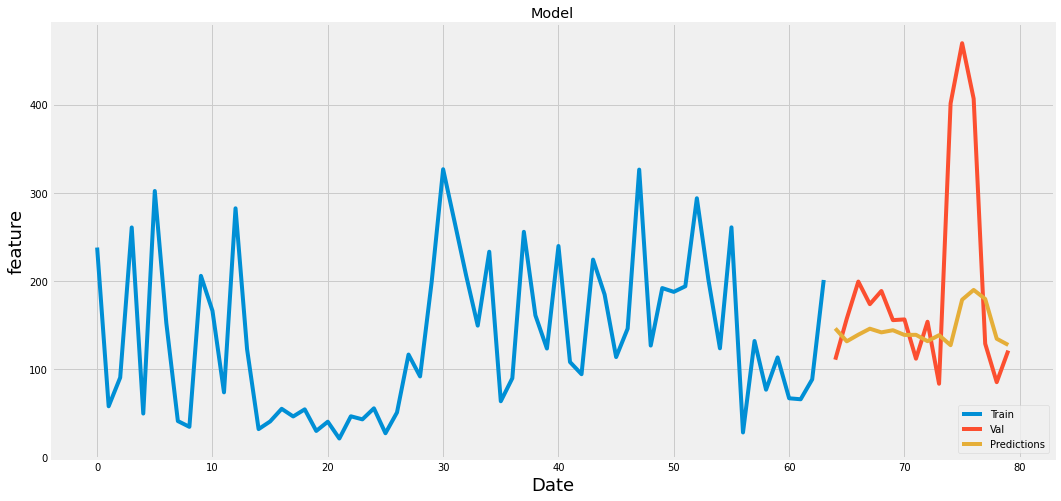

In [31]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('feature', fontsize=18)
plt.plot(train['feature'])
plt.plot(valid[['feature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()